# `Fase 2 --> Visualización`

> 📌 En esta fase vamos a  ver la representación gráfica de los patrones, relaciones y distribuciones presentes en el conjunto de datos. De este modo se facilita la comprensión y la identificación de tendencias significativas, anomalías e insights claves.  Es una forma de comunicación de los resultados, apoyando así la toma de decisiones  futuras en el trabajo o para el cliente. 

In [1]:
# importamos las librerías que necesitamos

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np
import re

# Imputación de nulos usando métodos avanzados estadísticos
# -----------------------------------------------------------------------
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

# Librerías de visualización
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt

# Evaluar linealidad de las relaciones entre las variables
# y la distribución de las variables
# -----------------------------------------------------------------------------
from scipy.stats import chi2_contingency, ttest_ind, shapiro, kstest, poisson, chisquare, expon

# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

# Gestión de los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")


In [2]:
df = pd.read_csv('DF_DATA#3.csv')
df.sample(10)

,Loyalty_Number,Year,Month,Flights_Booked,Flights_with_Companions,Total_Flights,Distance,Points_Accumulated,Points_Redeemed,Dollar_Cost_Points_Redeemed,Country,Province,City,Postal_Code,Gender,Education,Salary,Marital_Status,Loyalty_Card,CLV,Enrollment_Type,Enrollment_Year,Enrollment_Month
236544,161774,2018,March,0,0,0,0,0.00,0,0,Canada,Ontario,Toronto,M8Y 4K8,Male,Bachelor,61070.0,Divorced,Nova,5217.51,Standard,2015,3
262229,968253,2018,February,10,0,10,3150,393.75,0,0,Canada,Quebec,Montreal,H2T 9K8,Male,College,73479.0,Single,Nova,16280.20,Standard,2016,8
253442,166110,2018,April,0,0,0,0,0.00,0,0,Canada,British Columbia,Vancouver,V6E 3D9,Male,Bachelor,87951.0,Divorced,Nova,7887.96,Standard,2015,5
300318,870522,2018,June,6,1,7,2828,282.00,0,0,Canada,Quebec,Montreal,H2T 9K8,Female,Bachelor,70475.0,Married,Aurora,7089.68,Standard,2016,5
368371,908120,2018,October,10,0,10,3660,366.00,0,0,Canada,New Brunswick,Fredericton,E3B 2H2,Male,High School or Below,76905.0,Married,Aurora,9269.68,Standard,2013,9
211098,601105,2018,January,0,0,0,0,0.00,0,0,Canada,Ontario,Thunder Bay,K8T 5M5,Male,Bachelor,54798.0,Married,Star,12487.58,Standard,2012,9
139319,359138,2017,September,0,0,0,0,0.00,0,0,Canada,Ontario,Toronto,M8Y 4K8,Male,Bachelor,75700.0,Married,Nova,7596.29,Standard,2018,12
51935,184090,2017,April,0,0,0,0,0.00,0,0,Canada,British Columbia,Kelowna,V09 2E9,Male,Master,108324.0,Married,Star,2691.38,Standard,2017,8
229281,660395,2018,April,9,0,9,1116,138.75,0,0,Canada,Nova Scotia,Halifax,B3J 9S2,Male,Bachelor,67095.0,Married,Nova,7469.56,Standard,2016,7
268541,866604,2018,April,3,0,3,3171,475.50,0,0,Canada,Quebec,Hull,J8Y 3Z5,Female,College,73479.0,Married,Aurora,5619.69,Standard,2014,2


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403760 entries, 0 to 403759
Data columns (total 23 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Loyalty_Number               403760 non-null  int64  
 1   Year                         403760 non-null  int64  
 2   Month                        403760 non-null  object 
 3   Flights_Booked               403760 non-null  int64  
 4   Flights_with_Companions      403760 non-null  int64  
 5   Total_Flights                403760 non-null  int64  
 6   Distance                     403760 non-null  int64  
 7   Points_Accumulated           403760 non-null  float64
 8   Points_Redeemed              403760 non-null  int64  
 9   Dollar_Cost_Points_Redeemed  403760 non-null  int64  
 10  Country                      403760 non-null  object 
 11  Province                     403760 non-null  object 
 12  City                         403760 non-null  object 
 13 

# --> Contestando a las preguntas y sacando las conclusiones del análisis de forma visual!

### 1. ¿Cómo se distribuye la cantidad de vuelos reservados por mes durante el año?

In [4]:
flights = df.groupby('Month')['Flights_Booked'].sum().reset_index()
flights.sort_values(by ='Flights_Booked', ascending=False)

,Month,Flights_Booked
5,July,193431
6,June,173242
1,August,169204
2,December,166047
8,May,142170
11,September,136379
7,March,131199
10,October,129461
9,November,122250
0,April,112511


In [16]:
# Calcular el porcentaje de vuelos reservados por mes
flights['Percentage'] = (flights['Flights_Booked'] / flights['Flights_Booked'].sum()) * 100
flights

,Month,Flights_Booked,Percentage
6,July,193431,11.588496
5,June,173242,10.378968
7,August,169204,10.137051
11,December,166047,9.947914
4,May,142170,8.517437
8,September,136379,8.170497
2,March,131199,7.860162
9,October,129461,7.756038
10,November,122250,7.324026
3,April,112511,6.740560


In [5]:
fliyears = df.groupby('Year')['Flights_Booked'].sum().reset_index()
fliyears

,Year,Flights_Booked
0,2017,787410
1,2018,881754


In [6]:
# Definir el orden de los meses
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']

# Supongamos que df es tu DataFrame original
df['Month'] = pd.Categorical(df['Month'], categories=month_order, ordered=True)

# Agrupar por 'Year' y 'Month' y sumar 'Flights_Booked'
flight_years = df.groupby(['Year', 'Month'])['Flights_Booked'].sum().reset_index()

# Ordenar los datos por 'Year' y 'Month'
flight_years = flight_years.sort_values(by=['Year', 'Month'])

print(flight_years)



    Year      Month  Flights_Booked
0   2017    January           47766
1   2017   February           47691
2   2017      March           64271
3   2017      April           55720
4   2017        May           65279
5   2017       June           80493
6   2017       July           89288
7   2017     August           78692
8   2017  September           63304
9   2017    October           60351
10  2017   November           56905
11  2017   December           77650
12  2018    January           49170
13  2018   February           48643
14  2018      March           66928
15  2018      April           56791
16  2018        May           76891
17  2018       June           92749
18  2018       July          104143
19  2018     August           90512
20  2018  September           73075
21  2018    October           69110
22  2018   November           65345
23  2018   December           88397


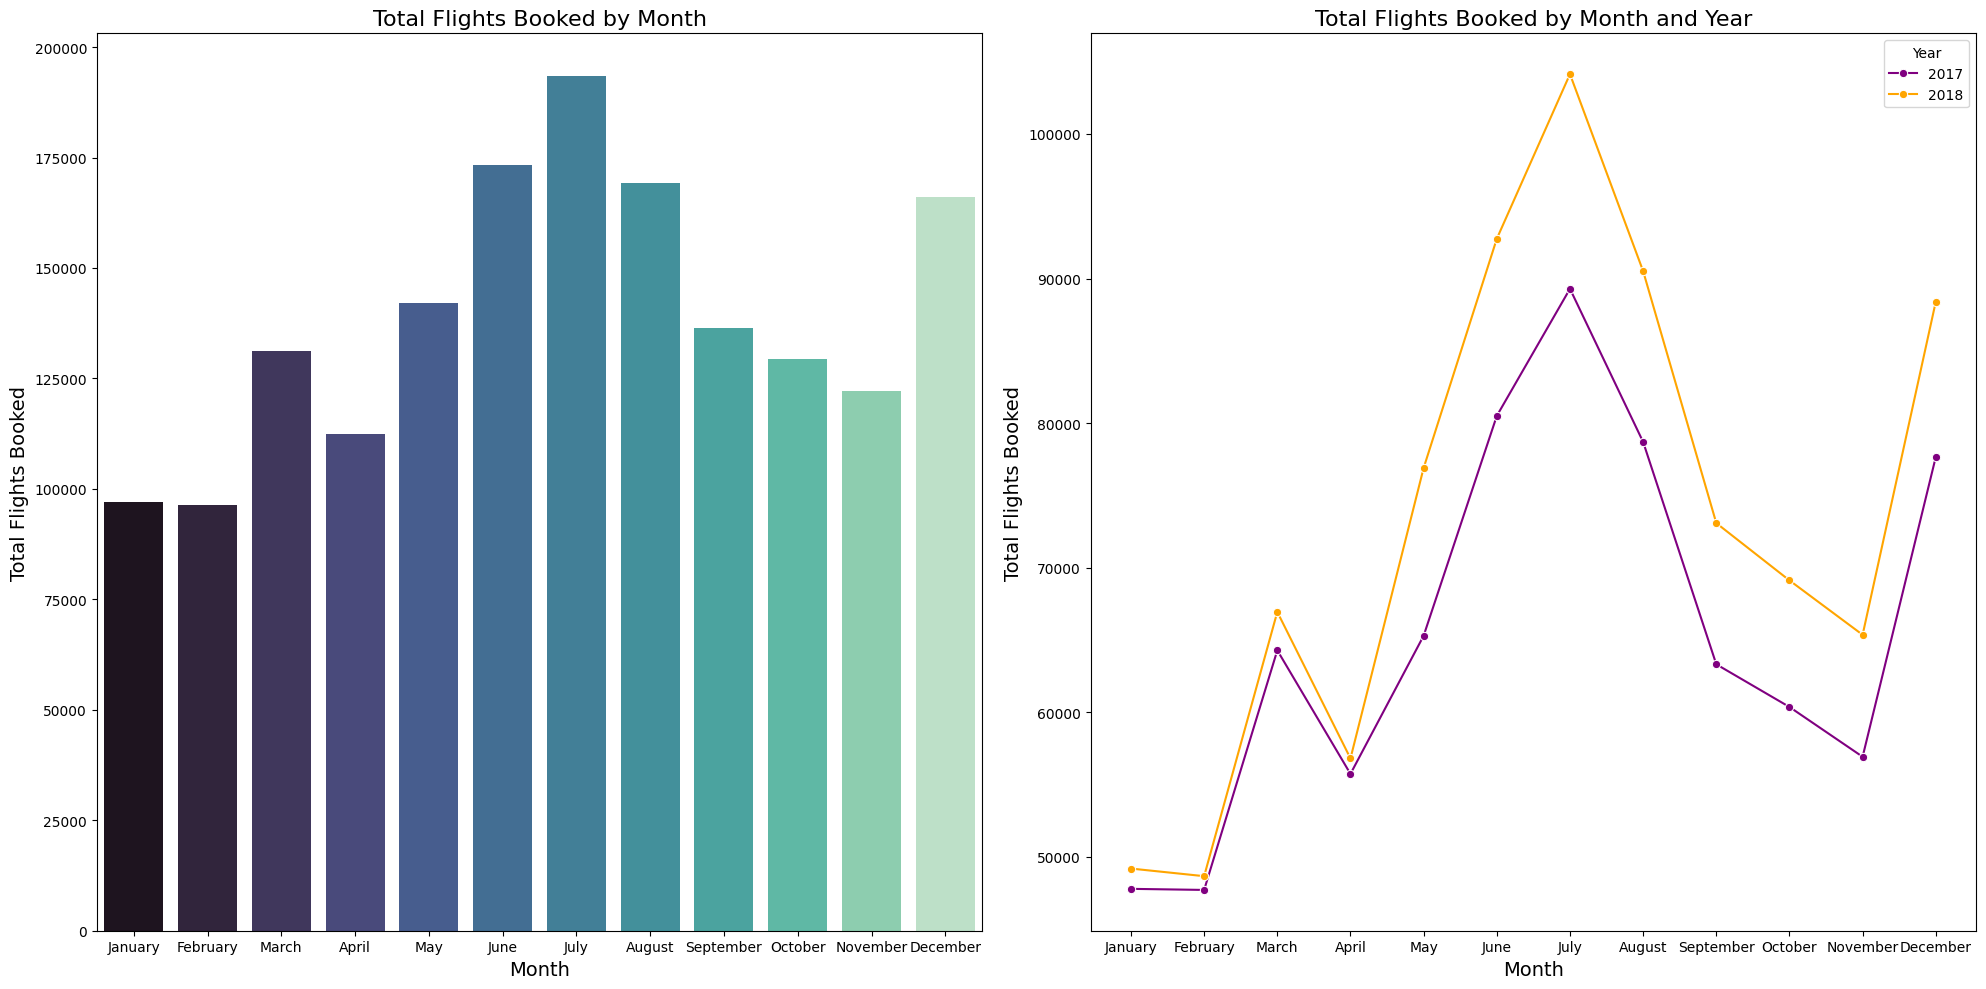

In [13]:
# Crear la figura y los ejes
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))
# Definir el orden de los meses
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']

# Crear el gráfico de barras
sns.barplot(x='Month', y='Flights_Booked', data=flights, palette='mako', order=month_order, ax=axes[0])

axes[0].set_title('Total Flights Booked by Month', fontsize=16)
axes[0].set_xlabel('Month', fontsize=14)
axes[0].set_ylabel('Total Flights Booked', fontsize=14)
# Configurar las etiquetas de los meses
axes[0].set_xticks(range(12))

# Crear el gráfico de líneas
sns.lineplot(x='Month', y='Flights_Booked', hue='Year', data=flight_years, marker='o', palette={2017: 'purple', 2018: 'orange'}, ax=axes[1])

axes[1].set_title('Total Flights Booked by Month and Year', fontsize=16)
axes[1].set_xlabel('Month', fontsize=14)
axes[1].set_ylabel('Total Flights Booked', fontsize=14)
# Configurar las etiquetas de los meses
axes[1].set_xticks(range(12))


# Ajustar el diseño para que las etiquetas no se solapen
plt.tight_layout()

# Mostrar la gráfica
plt.show()

> 🎯 **`CONCLUSIONES`:**  Durante el análisis de los datos, hemos descubierto que la mayoría de las personas tienen una fuerte preferencia por viajar y reservar sus vuelos durante los meses de **Junio, Julio y Agosto**. Entre estos meses, `--> Julio` destaca como el mes más popular entre los clientes. Esta tendencia sugiere una alta actividad de viaje y una preferencia marcada por el verano como la temporada preferida para volar. Además, es relevante mecionar que **Diciembre** ocupa el 4º lugar coincidiendo con las fiestas de la navidad.

### 2. ¿Existe una relación entre la distancia de los vuelos y los puntos acumulados por los clientes?


In [17]:
point_distance = df.groupby(['Loyalty_Number', 'Points_Accumulated'])['Distance'].sum().reset_index()
point_distance.sort_values(by ='Points_Accumulated', ascending=False)


,Loyalty_Number,Points_Accumulated,Distance
15363,164017,676.5,4518
24482,200519,675.0,4505
42443,274264,675.0,4505
139008,663270,667.5,4452
160395,748717,666.0,4446
...,...,...,...
190515,870687,0.0,0
21179,187758,0.0,0
120950,590393,0.0,0
190502,870574,0.0,0


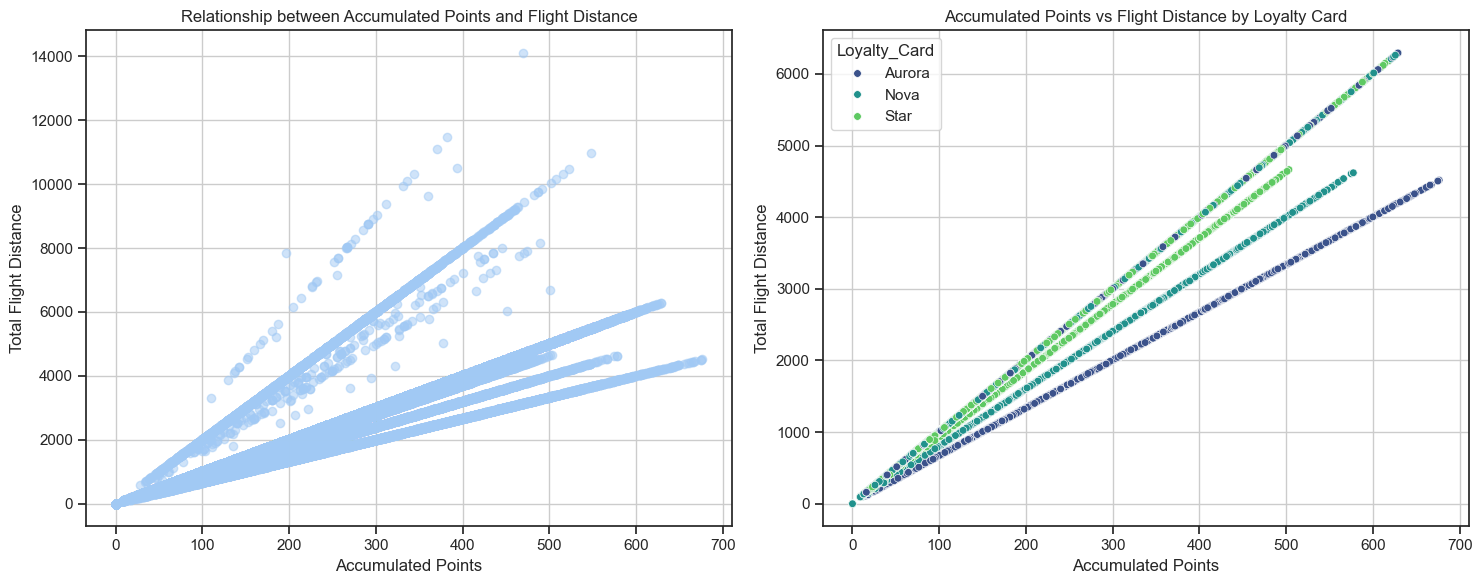

In [150]:
# Asegurarse de que las columnas estén en el tipo de datos correcto
df['Points_Accumulated'] = pd.to_numeric(df['Points_Accumulated'])
df['Distance'] = pd.to_numeric(df['Distance'])
df['Loyalty_Card'] = df['Loyalty_Card'].astype('category')

# Crear un layout de subplots 1 fila, 2 columnas
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Graficar diagrama de dispersión en el primer subplot
axes[0].scatter(point_distance['Points_Accumulated'], point_distance['Distance'], alpha=0.5)
axes[0].set_title('Relationship between Accumulated Points and Flight Distance')
axes[0].set_xlabel('Accumulated Points')
axes[0].set_ylabel('Total Flight Distance')
axes[0].grid(True)

# Graficar sns.lmplot en el segundo subplot
sns.scatterplot(x='Points_Accumulated', y='Distance', hue='Loyalty_Card', data=df,
           markers="o", palette="viridis", s=30, ax=axes[1])

axes[1].set_title('Accumulated Points vs Flight Distance by Loyalty Card')
axes[1].set_xlabel('Accumulated Points')
axes[1].set_ylabel('Total Flight Distance')
axes[1].grid(True)

plt.tight_layout()
plt.show()


> 🎯 **`CONCLUSIONES`:** Durante nuestro análisis, observamos una clara relación entre la distancia de los vuelos realizados por los clientes y la acumulación de puntos. --> Descubrimos que a medida que aumenta la distancia de los vuelos, los clientes tienen acumulados más puntos, lo cual cremos que les permite disfrutar de beneficios y recompensas en sus futuros viajes. Esta tendencia sugiere que los clientes valoran y aprovechan oportunidades para acumular puntos a través de viajes más largos, fortaleciendo así su lealtad y satisfacción con el programa de fidelidad.

### 3. ¿Cuál es la distribución de los clientes por provincia o estado?


In [55]:
provin_customer = df.groupby(['Province'])['Loyalty_Number'].count().reset_index()
provin_customer.sort_values(by ='Province')

,Province,Loyalty_Number
0,Alberta,23360
1,British Columbia,106442
2,Manitoba,15900
3,New Brunswick,15352
4,Newfoundland,6244
5,Nova Scotia,12507
6,Ontario,130258
7,Prince Edward Island,1584
8,Quebec,79573
9,Saskatchewan,9861


In [58]:
provin_customer['Percentage'] = (provin_customer['Loyalty_Number'] / provin_customer['Loyalty_Number'].sum()) * 100
# Ordenar el DataFrame por el porcentaje en orden ascendente
provin_customer_sorted = provin_customer.sort_values(by='Percentage', ascending=False)
# Mostrar el DataFrame ordenado
provin_customer_sorted

,Province,Loyalty_Number,Percentage
6,Ontario,130258,32.261244
1,British Columbia,106442,26.362691
8,Quebec,79573,19.707995
0,Alberta,23360,5.785615
2,Manitoba,15900,3.937983
3,New Brunswick,15352,3.802259
5,Nova Scotia,12507,3.097632
9,Saskatchewan,9861,2.442292
4,Newfoundland,6244,1.546463
10,Yukon,2679,0.663513


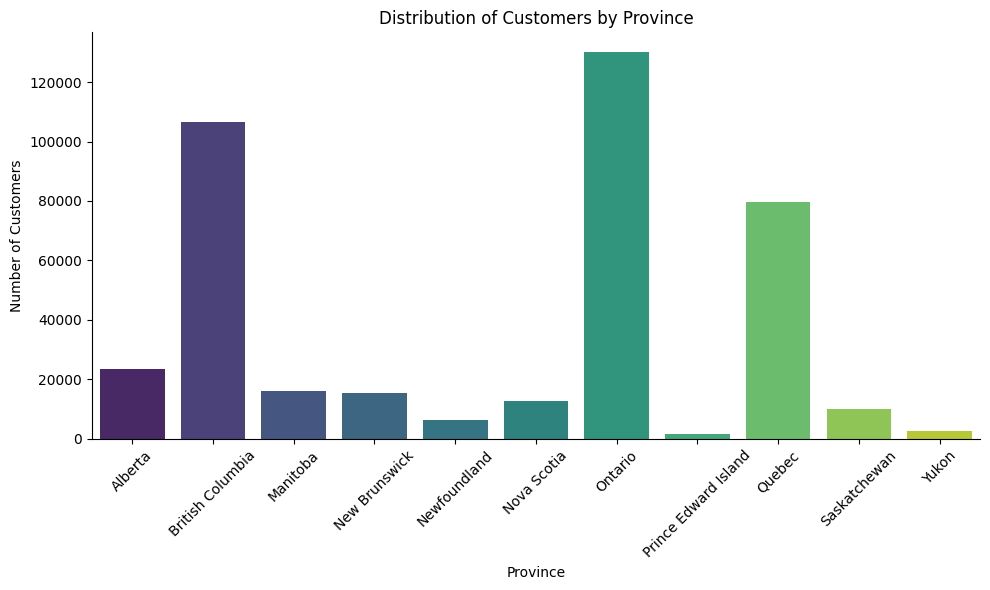

In [57]:
# Visualización de la distribución de clientes por provincia
plt.figure(figsize=(10, 6))
sns.barplot(x='Province', y='Loyalty_Number', data=provin_customer, palette='viridis')

plt.title('Distribution of Customers by Province')
plt.xlabel('Province')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.grid(False)

# quitamos la linea de arriba y de la derecha
plt.gca().spines['right'].set_visible(False) # quitamos la línea de la derecha
plt.gca().spines["top"].set_visible(False) # quitamos la línea de arriba;

# Ajustar el diseño para que las etiquetas no se solapen
plt.tight_layout()
# Mostrar la gráfica
plt.show()

> 🎯 **`CONCLUSIONES`:** La mayoría de nuestros clientes residen principalmente en `Ontario`, representando el 32% del total. Le siguen de cerca `British Columbia`, con un 26%, y `Quebec`, con un 19%. Estos datos subrayan la distribución geográfica de nuestros clientes en Canada y destacan las provincias donde nuestra base de clientes está más concentrada.

### 4. ¿Cómo se compara el salario promedio entre los diferentes niveles educativos de los clientes?


In [84]:
salary_mean = df.groupby(['Education'])['Salary'].mean().reset_index()
salary_mean.sort_values(by='Salary', ascending=False).round(2)

,Education,Salary
2,Doctor,178403.68
4,Master,103734.52
1,College,73479.00
0,Bachelor,72599.08
3,High School or Below,61146.38


In [85]:
salary_mean_gender = df.groupby(['Education', 'Gender'])['Salary'].mean().reset_index()
salary_mean_gender.sort_values(by='Salary', ascending=False).round(2)

,Education,Gender,Salary
5,Doctor,Male,181276.44
4,Doctor,Female,175594.68
9,Master,Male,105036.54
8,Master,Female,102549.31
2,College,Female,73479.00
3,College,Male,73479.00
0,Bachelor,Female,72757.82
1,Bachelor,Male,72437.76
6,High School or Below,Female,61237.59
7,High School or Below,Male,61050.45


_______By Education_____


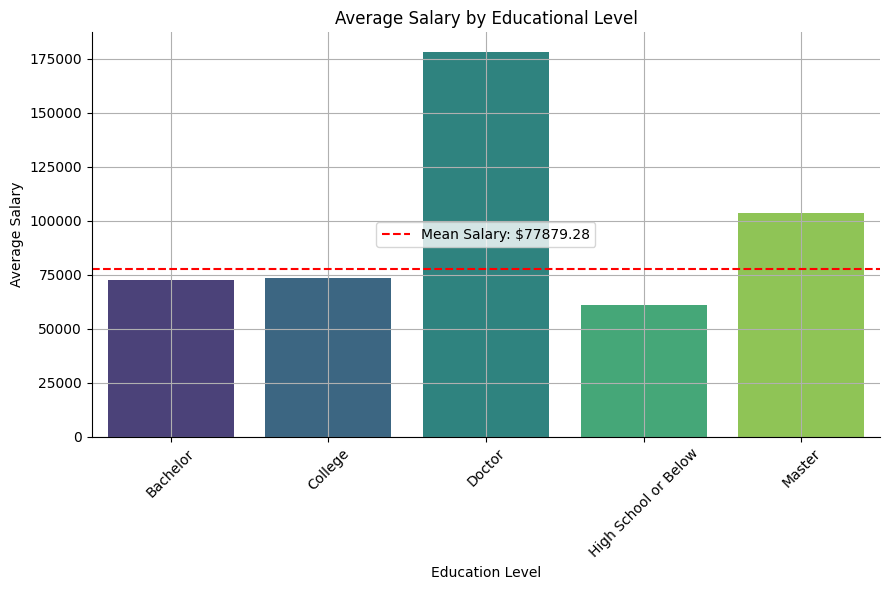

_______By Gender_____


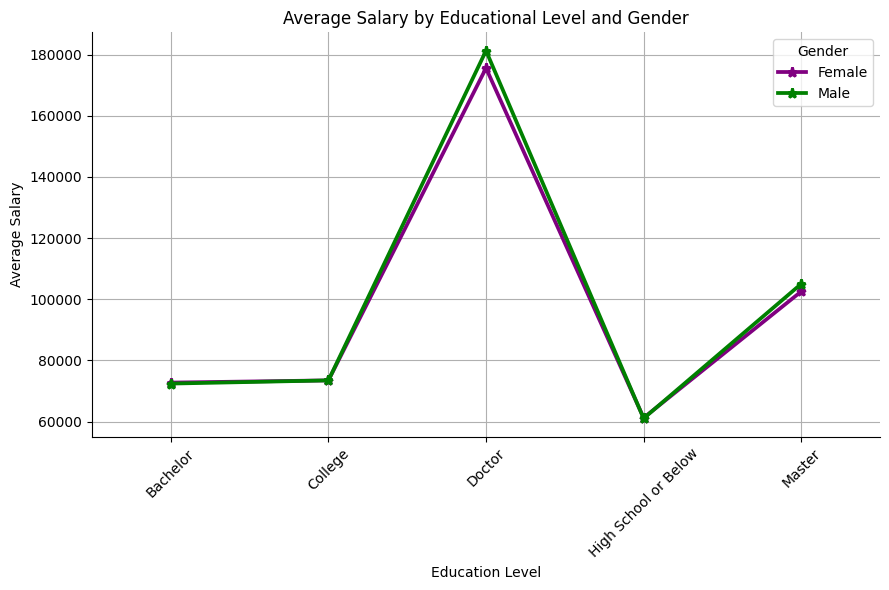

In [113]:
print('_______By Education_____')

# Crear la figura y el subplot para el gráfico de barras
fig, ax = plt.subplots(figsize=(9, 6))

# Gráfico de barras: Average Salary by Educational Level
sns.barplot(x='Education', y='Salary', data=salary_mean, palette='viridis', ax=ax)
ax.set_title('Average Salary by Educational Level')
ax.set_xlabel('Education Level')
ax.set_ylabel('Average Salary')
ax.tick_params(axis='x', rotation=45)
ax.grid(True)

# Calcular el promedio de salario
mean_salary = df['Salary'].mean()

# Agregar la línea para el promedio de salario
ax.axhline(mean_salary, color='red', linestyle='--', label=f'Mean Salary: ${mean_salary:.2f}')
ax.legend(loc='center')  # Colocar la leyenda en el centro

# Quitamos la línea de arriba y de la derecha
ax.spines['right'].set_visible(False)  # Quitamos la línea de la derecha
ax.spines["top"].set_visible(False)  # Quitamos la línea de arriba

# Ajustar el diseño y mostrar el gráfico
plt.tight_layout()
plt.show()

print('_______By Gender_____')

# Crear la figura y el subplot para el gráfico de puntos
fig, ax = plt.subplots(figsize=(9, 6))

# Gráfico de puntos: Pointplot agrupado por género
sns.pointplot(x='Education', y='Salary', hue='Gender', data=salary_mean_gender, marker='*', palette={'Male': 'g', 'Female': 'purple'}, ax=ax)
ax.set_title('Average Salary by Educational Level and Gender')
ax.set_xlabel('Education Level')
ax.set_ylabel('Average Salary')
ax.tick_params(axis='x', rotation=45)
ax.legend(title='Gender')
ax.grid(True)

# Quitamos la línea de arriba y de la derecha
ax.spines['right'].set_visible(False)  # Quitamos la línea de la derecha
ax.spines["top"].set_visible(False)  # Quitamos la línea de arriba

# Ajustar el diseño y mostrar el gráfico
plt.tight_layout()
plt.show()


> 🎯 **`CONCLUSIONES`:** El análisis de los datos revela que los clientes con un nivel educativo de `Doctorado` tienen el salario promedio más alto, con $178,403.68. Le siguen los que poseen un título de `Máster`, con una media de $103,734.52. Los niveles educativos de `Bachelor y College` tienen salarios promedio sobre los $70,000, mientras que aquellos con educación secundaria o inferior `(High School or Below)` tienen salarios por debajo de este umbral.


### 5. ¿Cuál es la proporción de clientes con diferentes tipos de tarjetas de fidelidad?


In [114]:
customer_cad = df.groupby(['Loyalty_Card'])['Loyalty_Number'].count().reset_index()
customer_cad.sort_values(by='Loyalty_Card', ascending=False)


,Loyalty_Card,Loyalty_Number
2,Star,183745
1,Nova,136883
0,Aurora,83132


In [115]:
customer_card_gender = df.groupby(['Loyalty_Card', 'Gender'])['Loyalty_Number'].count().reset_index()
customer_card_gender.sort_values(by='Loyalty_Card', ascending=False)

,Loyalty_Card,Gender,Loyalty_Number
4,Star,Female,91630
5,Star,Male,92115
2,Nova,Female,69677
3,Nova,Male,67206
0,Aurora,Female,41450
1,Aurora,Male,41682


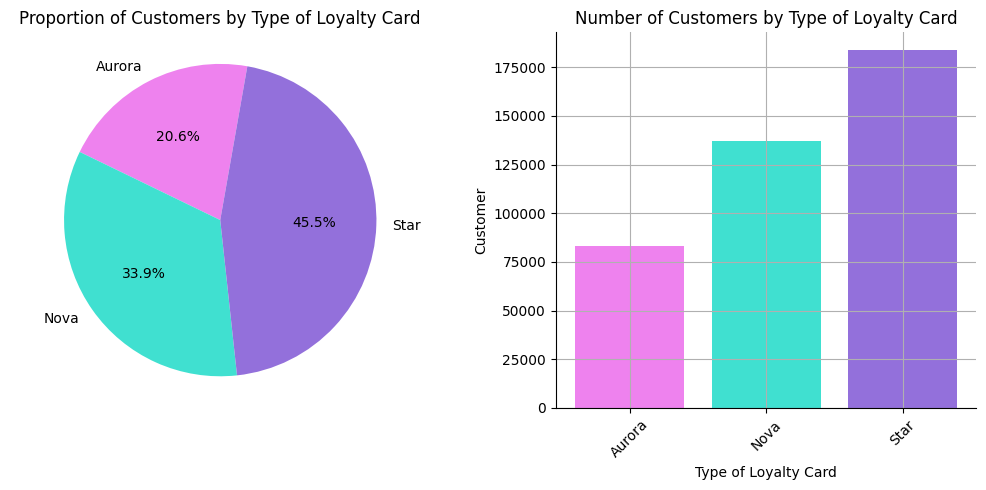

In [122]:
# Configurar los datos para el gráfico de pie
labels = customer_cad['Loyalty_Card']
sizes = customer_cad['Loyalty_Number']

# Crear la figura y los ejes para 1 fila y 2 columnas
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Crear el gráfico de pie en el primer eje
ax[0].pie(sizes, labels=labels, colors=['violet', 'turquoise', 'mediumpurple'], autopct='%1.1f%%', startangle=80)
ax[0].set_title('Proportion of Customers by Type of Loyalty Card')
ax[0].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Crear el gráfico de barras en el segundo eje
colors = ['violet', 'turquoise', 'mediumpurple']
ax[1].bar(customer_cad['Loyalty_Card'], customer_cad['Loyalty_Number'], color=colors)
ax[1].set_xlabel('Type of Loyalty Card')
ax[1].set_ylabel('Customer')
ax[1].set_title('Number of Customers by Type of Loyalty Card')
ax[1].tick_params(axis='x', rotation=45)  # Rotar las etiquetas del eje x si es necesario
ax[1].grid(True)

# quitamos la linea de arriba y de la derecha
plt.gca().spines['right'].set_visible(False) # quitamos la línea de la derecha
plt.gca().spines["top"].set_visible(False) # quitamos la línea de arriba;

# Ajustar el diseño para que no se solapen las etiquetas
plt.tight_layout()

# Mostrar los gráficos
plt.show()


> 🎯 **`CONCLUSIONES`:**  Podemos evideniar que casi la mitad de los clientes, --> un 45% de un total de 16,737, poseen la tarjeta de fidelización `Star`. En segundo lugar, la tarjeta `Nova` es utilizada por el 34% de los clientes, mientras que la tarjeta `Aurora` es la menos común, con un 21%. Esta distribución sugiere una fuerte preferencia por la tarjeta Star entre los clientes, sin embargo sos datos interesantes, ya que cada una tiene sus beneficios segun el tipo de cliente. 

### 6. ¿Cómo se distribuyen los clientes según su estado civil y género?

In [126]:
df_marital = df.groupby(["Marital_Status", "Gender"])["Loyalty_Number"].count().reset_index()
df_marital

,Marital_Status,Gender,Loyalty_Number
0,Divorced,Female,30634
1,Divorced,Male,30128
2,Married,Female,117363
3,Married,Male,117482
4,Single,Female,54760
5,Single,Male,53393


In [127]:
df_marital1 = df.groupby("Marital_Status")["Loyalty_Number"].count().reset_index()
df_marital1

,Marital_Status,Loyalty_Number
0,Divorced,60762
1,Married,234845
2,Single,108153


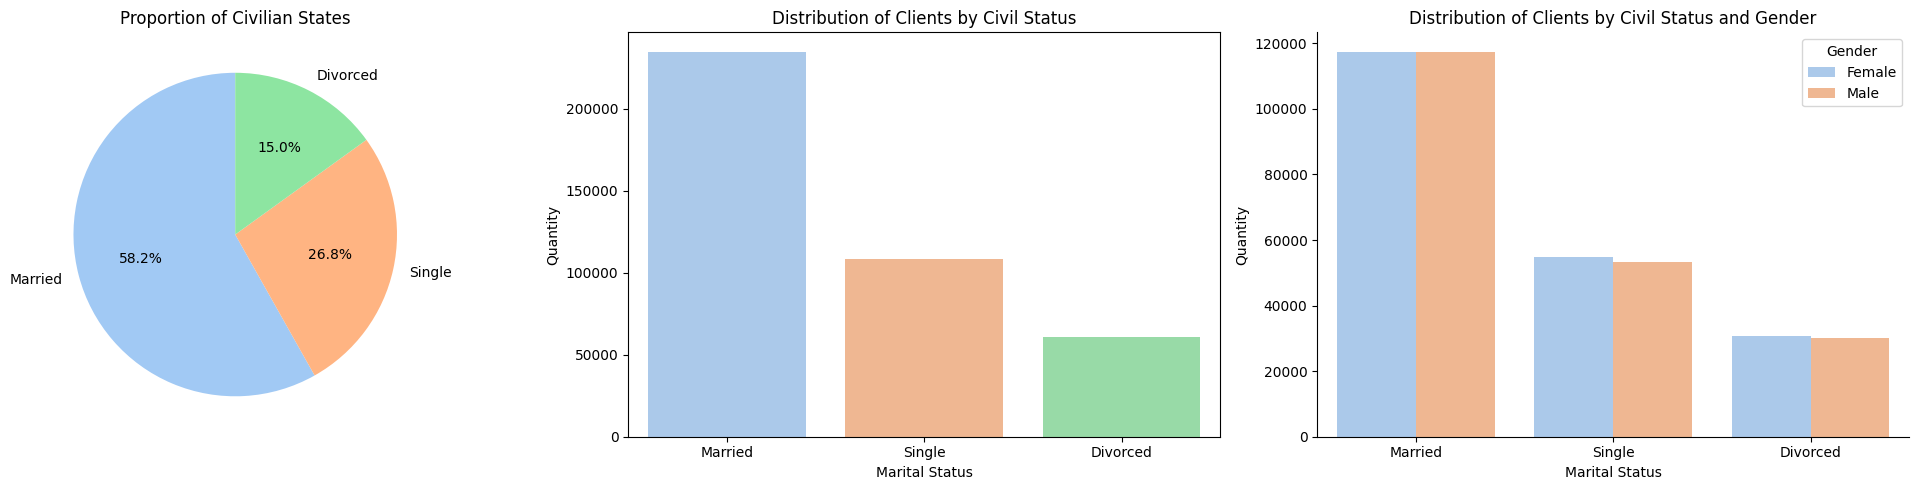

In [128]:
# Configurar los datos para el gráfico de pie
marital_status_counts = df['Marital_Status'].value_counts().reset_index()
marital_status_counts.columns = ['Marital_Status', 'Count']

# Crear la figura y los ejes para 1 fila y 3 columnas
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 5))

# Crear el gráfico de pie en el primer eje
axes[0].pie(marital_status_counts['Count'], labels=marital_status_counts['Marital_Status'], autopct='%1.1f%%', startangle=90, colors=sns.color_palette("pastel", len(marital_status_counts)))
axes[0].set_title('Proportion of Civilian States')

# Crear el gráfico de conteo en el segundo eje
sns.countplot(x="Marital_Status", data=df, palette="pastel", ax=axes[1])
axes[1].set_title('Distribution of Clients by Civil Status')
axes[1].set_xlabel('Marital Status')
axes[1].set_ylabel('Quantity')

# Agrupar los datos por estado civil y género
df_marital_gender = df.groupby(['Marital_Status', 'Gender']).size().reset_index(name='Count')

# Crear el gráfico de conteo desglosado por género en el tercer eje
sns.countplot(x='Marital_Status', hue='Gender', data=df, palette='pastel', ax=axes[2])
axes[2].set_title('Distribution of Clients by Civil Status and Gender')
axes[2].set_xlabel('Marital Status')
axes[2].set_ylabel('Quantity')
axes[2].legend(title='Gender')

# quitamos la linea de arriba y de la derecha
plt.gca().spines['right'].set_visible(False) # quitamos la línea de la derecha
plt.gca().spines["top"].set_visible(False) # quitamos la línea de arriba;

# Ajustar el diseño para que no se solapen las etiquetas
plt.tight_layout()

# Mostrar los gráficos
plt.show()


> 🎯 **`CONCLUSIONES`:**  El análisis de los datos revelado por estado civil, nos da una idea de segmentos distintos a tener en cuenta dentro de nuestra base de clientes. El alto porcentaje de clientes `casados`, --> representando el 58%, dando a entender una propensión a viajar en familia o en pareja. Por otro lado, el 27% de clientes `solteros` refleja un segmento posiblemente más joven o individuos que viajan por motivos personales o profesionales. Y finalmente los `divorsiados` con un 15% pueden estar sujetos a valoraciones del día a día. 